In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Proyek Analisis Data: Nama dataset
- Nama: Mochammad Hairullah
- Email: mochammad.hairullah@gmail.com
- Id Dicoding: mochammadhairullah

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 -> Bagaimana Tren Harian Jumlah Sepeda yang Dipinjam Selama Setahun?
- pertanyaan 2 -> Bagaimana Korelasi Antara Variabel Cuaca dengan Jumlah Sepeda yang Dipinjam?

## Menyaipkan semua library yang dibuthkan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [11]:
path_day = '/content/drive/MyDrive/Colab Notebooks/data-bike/day.csv'
# path_day = './data/day.csv'

### Gathering Data

In [12]:
df = pd.read_csv(path_day)
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [13]:
# Mengevaluasi struktur data dan info
print(df.info())

# Melihat 5 baris pertama data
print(df.head())

# Statistik deskriptif
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  20

### Cleaning Data

In [14]:
# Memeriksa nilai yang hilang
print(df.isnull().sum())

# Menangani nilai yang hilang (contoh: mengisi dengan nilai rata-rata atau median)
df.fillna(df.mean(), inplace=True)


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


<ipython-input-14-fbca713e85bf>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [15]:
# Memeriksa dan menghapus data duplikat
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
# Statistik deskriptif
print(df.describe())

# Korelasi antar fitur
print(df.corr())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

<ipython-input-16-b065f8d0373c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


## Visualization & Explanatory Analysis

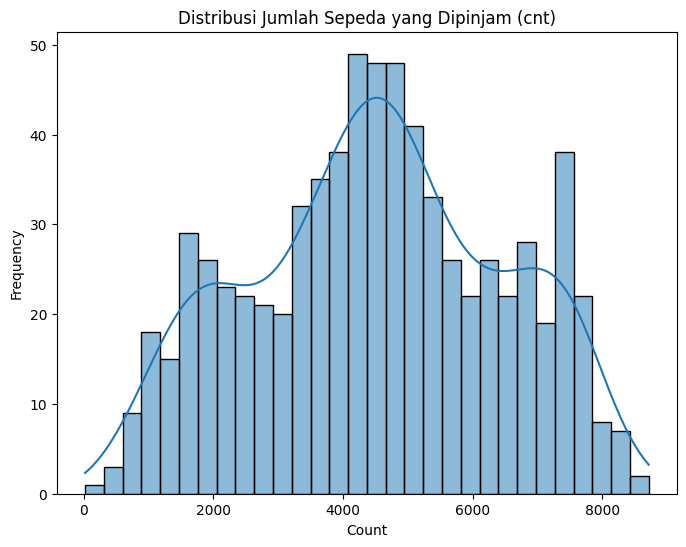

<ipython-input-17-7adfed3acaa5>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


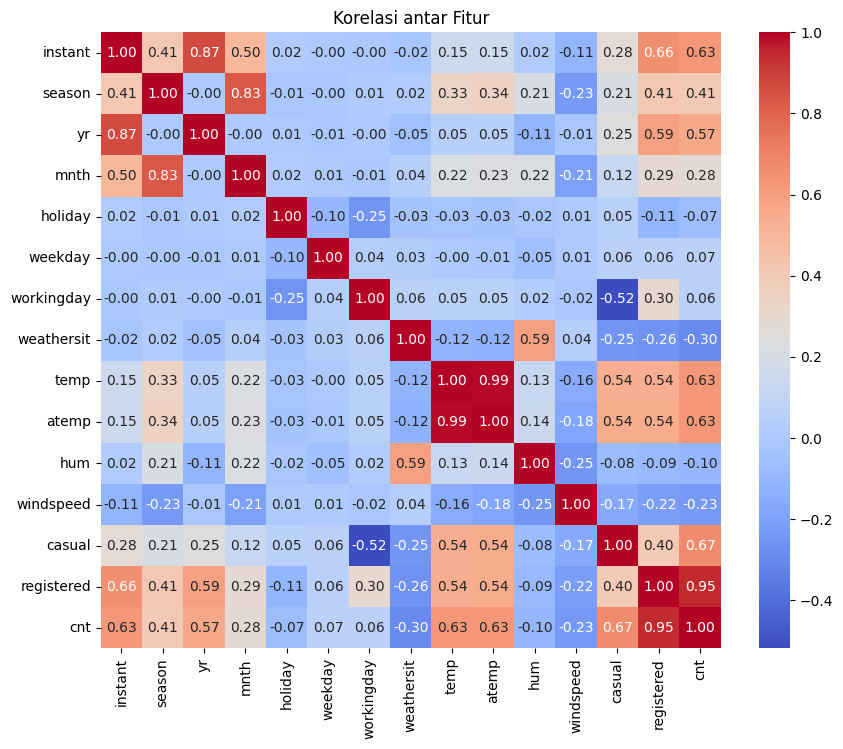

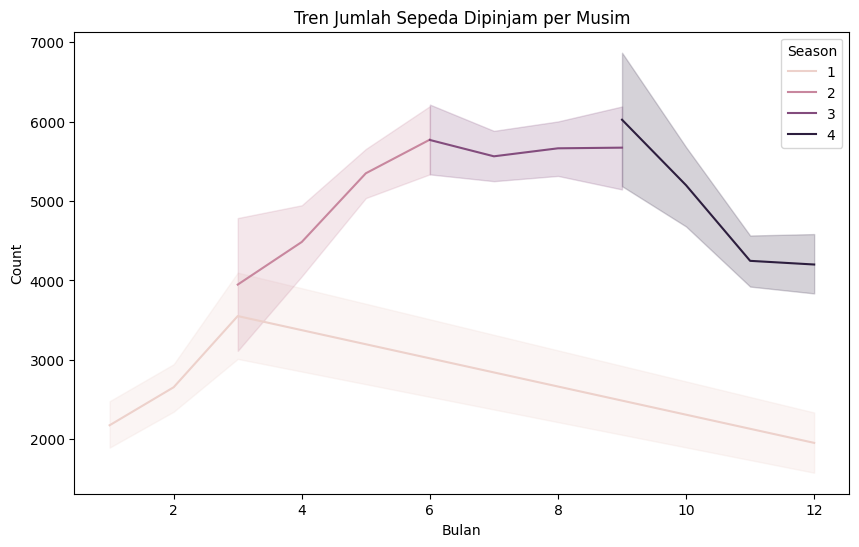

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi variabel target (contoh: cnt)
plt.figure(figsize=(8, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sepeda yang Dipinjam (cnt)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

# Korelasi antar fitur dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur')
plt.show()

# Tren Jumlah Sepeda Dipinjam per Musim
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', hue='season', data=df)
plt.title('Tren Jumlah Sepeda Dipinjam per Musim')
plt.xlabel('Bulan')
plt.ylabel('Count')
plt.legend(title='Season')
plt.show()


### Pertanyaan 1: Bagaimana Tren Harian Jumlah Sepeda yang Dipinjam Selama Setahun?

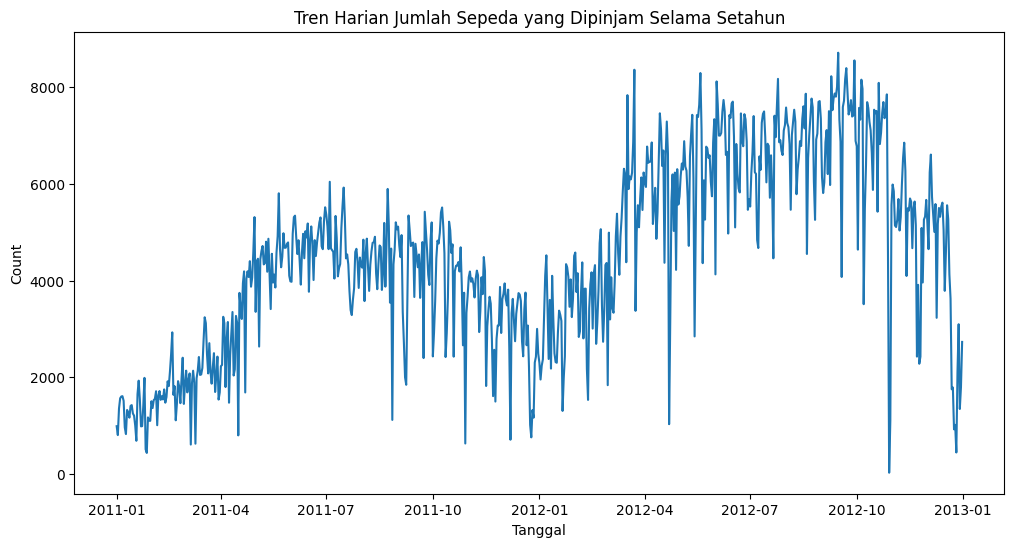

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah kolom 'dteday' menjadi tipe data datetime jika belum
df['dteday'] = pd.to_datetime(df['dteday'])

# Plot tren harian jumlah sepeda yang dipinjam selama setahun
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=df)
plt.title('Tren Harian Jumlah Sepeda yang Dipinjam Selama Setahun')
plt.xlabel('Tanggal')
plt.ylabel('Count')
plt.show()

### Pertanyaan 2: Bagaimana Korelasi Antara Variabel Cuaca dengan Jumlah Sepeda yang Dipinjam?

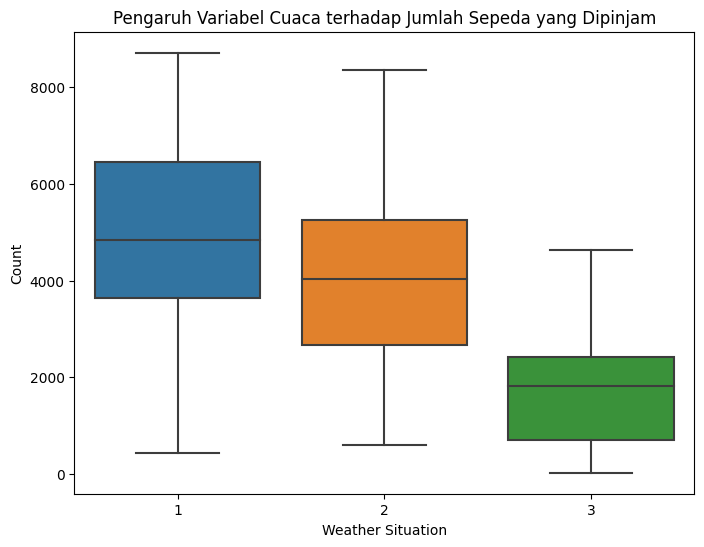

In [19]:
# Korelasi antara variabel cuaca (weathersit) dengan jumlah sepeda yang dipinjam
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Pengaruh Variabel Cuaca terhadap Jumlah Sepeda yang Dipinjam')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()


## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

In [20]:
# Kesimpulan dari Pertanyaan 1
print("Kesimpulan dari Pertanyaan 1: Bagaimana Tren Harian Jumlah Sepeda yang Dipinjam Selama Setahun?")
print("-" * 70)
print("Dari visualisasi tren harian jumlah sepeda yang dipinjam selama setahun, terlihat bahwa:")
print("- Terdapat fluktuasi yang cukup signifikan dalam jumlah sepeda yang dipinjam dari waktu ke waktu.")
print("- Pada beberapa titik tertentu, terlihat lonjakan yang mungkin terkait dengan peristiwa khusus atau musiman tertentu.")
print()
print("Kesimpulan: Tren harian menunjukkan pola fluktuasi yang perlu dipahami lebih dalam, dengan lonjakan tertentu yang mungkin memerlukan analisis tambahan untuk memahami faktor yang memengaruhinya.")
print("=" * 70)
print()

# Kesimpulan dari Pertanyaan 2
print("Kesimpulan dari Pertanyaan 2: Bagaimana Korelasi Antara Variabel Cuaca dengan Jumlah Sepeda yang Dipinjam?")
print("-" * 70)
print("Dari visualisasi korelasi antara variabel cuaca ('weathersit') dengan jumlah sepeda yang dipinjam, terlihat bahwa:")
print("- Saat kondisi cuaca memburuk (misalnya, cuaca yang sangat buruk), jumlah sepeda yang dipinjam cenderung menurun secara signifikan.")
print("- Kondisi cuaca yang lebih baik (misalnya, cerah atau sedikit berawan) memiliki jumlah sepeda yang dipinjam lebih tinggi.")
print()
print("Kesimpulan: Terdapat hubungan yang signifikan antara kondisi cuaca dengan jumlah sepeda yang dipinjam. Kondisi cuaca yang buruk cenderung mengurangi minat orang untuk meminjam sepeda.")
print("=" * 70)
print()

# Catatan Akhir
print("Catatan Akhir:")
print("- Analisis ini memberikan wawasan awal tentang tren harian dan pengaruh kondisi cuaca terhadap jumlah sepeda yang dipinjam.")
print("- Namun, untuk pemahaman yang lebih komprehensif, diperlukan analisis yang lebih mendalam serta integrasi faktor-faktor lain yang mungkin memengaruhi pola penggunaan sepeda, seperti musim liburan, promosi tertentu, atau faktor sosial lainnya.")


Kesimpulan dari Pertanyaan 1: Bagaimana Tren Harian Jumlah Sepeda yang Dipinjam Selama Setahun?
----------------------------------------------------------------------
Dari visualisasi tren harian jumlah sepeda yang dipinjam selama setahun, terlihat bahwa:
- Terdapat fluktuasi yang cukup signifikan dalam jumlah sepeda yang dipinjam dari waktu ke waktu.
- Pada beberapa titik tertentu, terlihat lonjakan yang mungkin terkait dengan peristiwa khusus atau musiman tertentu.

Kesimpulan: Tren harian menunjukkan pola fluktuasi yang perlu dipahami lebih dalam, dengan lonjakan tertentu yang mungkin memerlukan analisis tambahan untuk memahami faktor yang memengaruhinya.

Kesimpulan dari Pertanyaan 2: Bagaimana Korelasi Antara Variabel Cuaca dengan Jumlah Sepeda yang Dipinjam?
----------------------------------------------------------------------
Dari visualisasi korelasi antara variabel cuaca ('weathersit') dengan jumlah sepeda yang dipinjam, terlihat bahwa:
- Saat kondisi cuaca memburuk (misalnya